# Import Need libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\TOSIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\TOSIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# Importing the Scrape text file

In [2]:
myfile = open('20th_century_Wiki.txt', encoding='utf-8') 

In [3]:
# Import txt file

with open('20th_century_Wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [4]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                       Appearance                 Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 The world at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)         1.1.2 The Russian Revolution and Communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictators

In [5]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2', 'The', 'Russian', 'Revolution', 'a

In [6]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4813 samples and 21818 outcomes>


In [7]:
dist_words.most_common(10)

[('.', 1569),
 ('the', 1095),
 (',', 965),
 ('of', 603),
 ('and', 398),
 ('The', 331),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 291)]

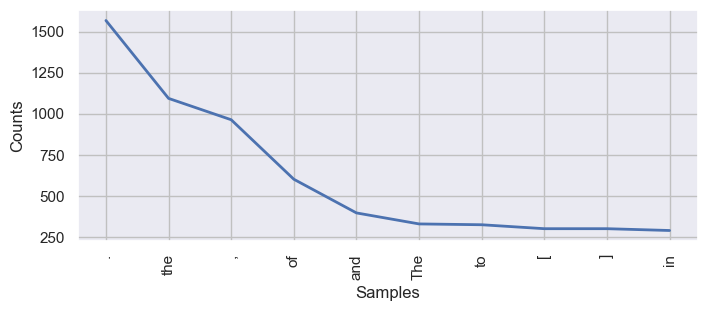

In [11]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# Remove stop words (and punctuation marks if necessary)

In [12]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'re', 'shouldn', 'it', 'other', 'just', "didn't", 'through', 'this', 'down', "haven't", 'hasn', "mightn't", "hasn't", 'don', 'not', 'now', 'her', 'isn', 'was', 'more', 'an', 'hadn', 'those', 'hers', 'there', 't', 'at', 'below', 'here', 'same', "it's", 'from', 'herself', 'been', "you've", "needn't", "wouldn't", 'does', 'that', 've', 'where', 'the', "you'll", 'a', 'while', 'mustn', 'again', 'but', "doesn't", "won't", 'under', 'doing', 'with', "aren't", 'than', 'when', 'for', 'by', 'ain', "you'd", 'few', 'before', 'any', 'am', 'why', 'its', 'after', "shan't", 'between', 'both', "hadn't", 'won', 'in', 'wouldn', 'all', 'such', 'aren', 'over', 'o', 'my', 's', 'm', 'couldn', 'to', 'be', 'having', 'out', "mustn't", 'ourselves', 'our', 'into', "isn't", 'up', 'did', 'yours', 'needn', 'how', 'were', 'can', 'doesn', 'or', 'off', 'so', "don't", 'me', 'haven', 'didn', 'as', 'your', 'weren', "wasn't", 'wasn', 'being', "shouldn't", 'which', 'll', 'theirs', 'and', 'no', 'very', 'once', 'should', 'most

In [13]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [15]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'file',
 'Search',
 'Search',
 'Appearance',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'The',
 'world',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2',
 'The',
 'Russian',
 'Revolution',
 'Communism',
 '1.2',
 'Between',
 'wars',
 '1.2.1',

In [16]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4710 samples and 17158 outcomes>


In [17]:
dist_words_filter.most_common(10)


[('.', 1569),
 (',', 965),
 ('The', 331),
 ('[', 302),
 (']', 302),
 ("''", 278),
 ('``', 274),
 ('^', 268),
 ('(', 243),
 (')', 243)]

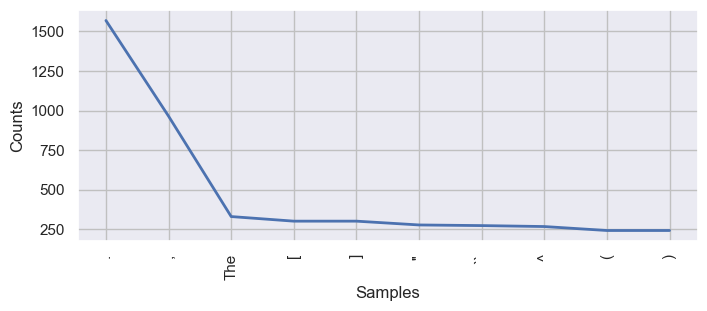

In [18]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [19]:
dist_words_filter

FreqDist({'.': 1569, ',': 965, 'The': 331, '[': 302, ']': 302, "''": 278, '``': 274, '^': 268, '(': 243, ')': 243, ...})

In [20]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [21]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Search    Search    Appearance    Create    account    Log    Personal    tools    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           The    world    beginning    century                   The    war    end    wars               World    War    I                                              The    Russian    Revolution    Communism           Between    wars             Economic    depression             The    rise    dictatorship           Global    war  

In [22]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', '

In [23]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

In [24]:
dist_words_filter_2.most_common(10)

[('The', 332),
 ('December', 222),
 ('Retrieved', 206),
 ('War', 129),
 ('s', 100),
 ('war', 91),
 ('th', 87),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 51)]

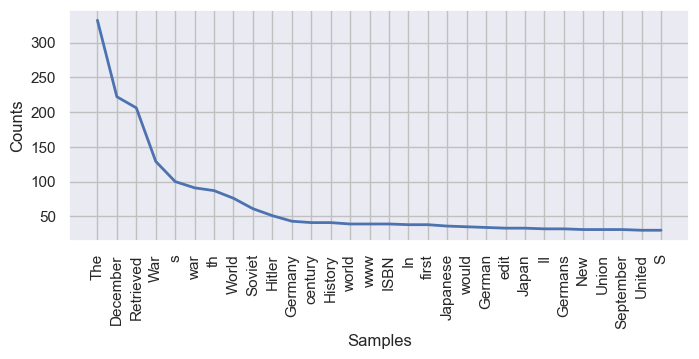

In [25]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

## The frequency count has been reduced
## The main character's letters have made it into the list frequency
## he results look much better will help insightful decision making 

# Create a tags list using TextBlob.

In [26]:
new_stopwords = ['th', 'Then', 'in', 'S', 'The']

In [27]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [28]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 6.43 ms


In [29]:
text

TextBlob("['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Backgrou

In [30]:
tags_list = text.tags

In [31]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Personal", 'NNP'),
 ("'"

In [32]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [33]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [34]:
df_t = df_text.groupby('Word type').count().reset_index()

In [35]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,12
3,EX,12
4,FW,43


In [38]:
top10 = df_t.nlargest(10, 'Words')

In [39]:
top10

,Word type,Words
13,POS,6992
11,NNP,5595
12,NNS,1050
16,VBD,848
10,NN,381
17,VBG,320
6,JJ,285
5,IN,158
15,RB,140
1,CD,75


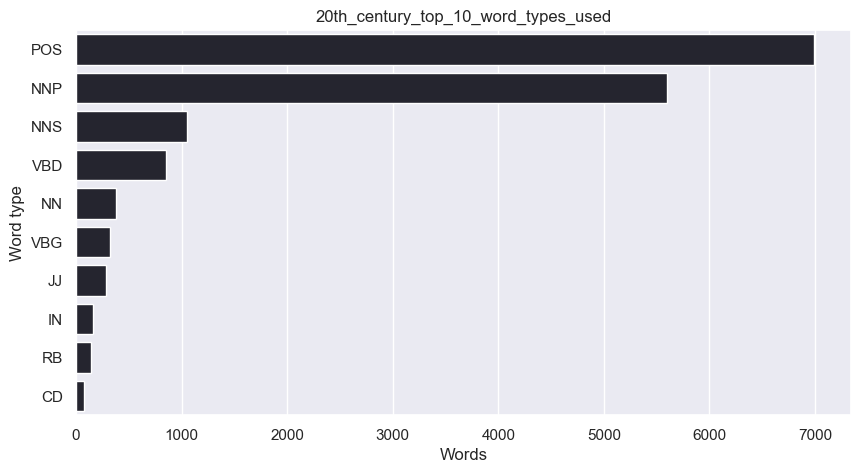

In [40]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th_century_top_10_word_types_used")

# Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives. Analyzing the results

## nouns

In [41]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [42]:
top15

,Word,Occurences
292,'December,222
1258,'War,129
2579,'war,91
1305,'World,76
1105,'Soviet,61
536,'Hitler,51
1494,'century,41
535,'History,41
2605,'world,39
2612,'www,39


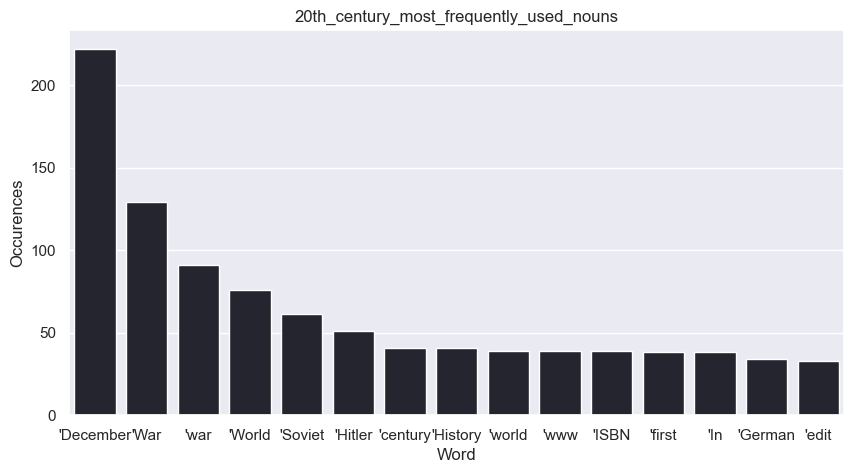

In [43]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th_century_most_frequently_used_nouns")

## The most frequent research words on the 20th century is War (the combination of both war in Cap and small letter is highest) 
## The most frequently used nouns is about the month of the year 


## verbs

In [44]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [45]:
top15

,Word,Occurences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
307,'turned,7


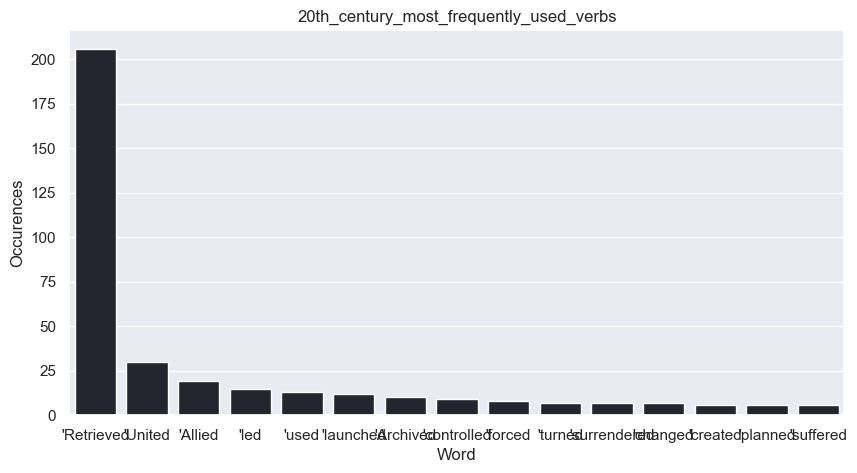

In [47]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th_century_most_frequently_used_verbs")

## These plot show that people visit the 20th century to research about War and retried information about the war

## adjectives

In [48]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [51]:
top15

,Word,Occurences
28,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
43,'Russian,6
1,'African,6
104,'political,6
105,'possible,5
7,'Baltic,5


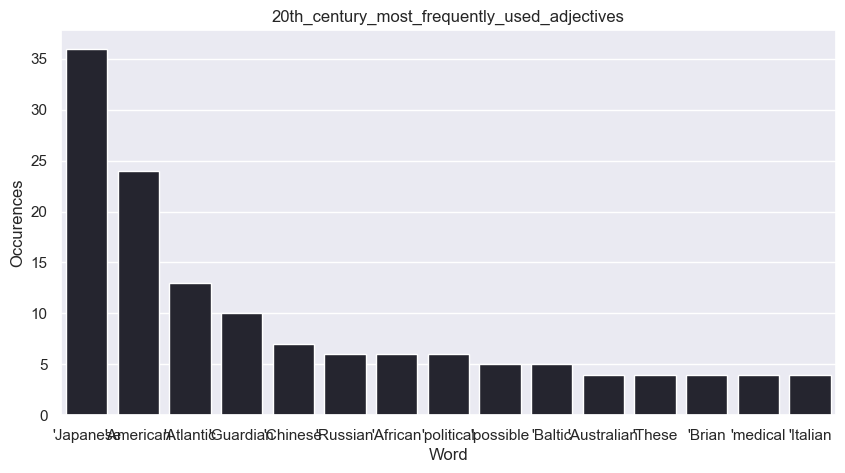

In [50]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th_century_most_frequently_used_adjectives")

## Most researchers/visitors are interested in the part played by Japanese, Americans in the 20th_century

# Create a dataframe with the countries and the number of times they’re mentioned in your text

In [53]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Appearance Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table contents 

In [54]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [56]:
countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [57]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [58]:
# Replace names with aliases

countries['country_name'] = countries['country_name'].replace('Bill the Lizard','Bill')
countries['country_name'] = countries['country_name'].replace('The Queen of Hearts','Queen')
countries['country_name'] = countries['country_name'].replace('The King of Hearts','King')
countries['country_name'] = countries['country_name'].replace('The Knave of Hearts','Knave')

In [59]:
countries

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
...,...
205,Sahrawi Arab Democratic Republic
206,Somaliland
207,South Ossetia
208,Taiwan


In [60]:
countries['character_alias'] = countries['country_name'].apply(lambda x: x.rsplit(' ', 1)[-1])

In [61]:
countries

,country_name,character_alias
1,Afghanistan,
2,Albania,
3,Algeria,
4,Andorra,
5,Angola,
...,...,...
205,Sahrawi Arab Democratic Republic,
206,Somaliland,
207,South Ossetia,
208,Taiwan,


In [62]:
countries_list = countries['character_alias'].to_list()

In [63]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [64]:
dict_of_counts

{'': 0,
 'Azerbaijan': 0,
 'Burundi': 0,
 'Republic': 4,
 'Ethiopia': 0,
 'France': 16,
 'Guinea': 4,
 'Guyana': 0,
 'Hungary': 3,
 'Coast': 0,
 'Jordan': 0,
 'Kyrgyzstan': 0,
 'Luxembourg': 1,
 'Myanmar': 0,
 'Norway': 5,
 'Oman': 0,
 'Portugal': 0,
 'Qatar': 0,
 'Rwanda': 0,
 'Syria': 0,
 'Tuvalu': 0,
 'Uzbekistan': 0,
 'Vietnam': 13,
 'Yemen': 0,
 'Zimbabwe': 0,
 'Transnistria': 0}

In [65]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [66]:
df

,,Azerbaijan,Burundi,Republic,Ethiopia,France,Guinea,Guyana,Hungary,Coast,...,Portugal,Qatar,Rwanda,Syria,Tuvalu,Uzbekistan,Vietnam,Yemen,Zimbabwe,Transnistria
0,0,0,0,4,0,16,4,0,3,0,...,0,0,0,0,0,0,13,0,0,0


In [67]:
df = df.transpose().reset_index()

In [68]:
df

,index,0
0,,0
1,Azerbaijan,0
2,Burundi,0
3,Republic,4
4,Ethiopia,0
5,France,16
6,Guinea,4
7,Guyana,0
8,Hungary,3
9,Coast,0


In [69]:
df.rename(columns = {"index":"countries", 0:"Times mentioned"}, inplace = True)

In [70]:
df

,countries,Times mentioned
0,,0
1,Azerbaijan,0
2,Burundi,0
3,Republic,4
4,Ethiopia,0
5,France,16
6,Guinea,4
7,Guyana,0
8,Hungary,3
9,Coast,0


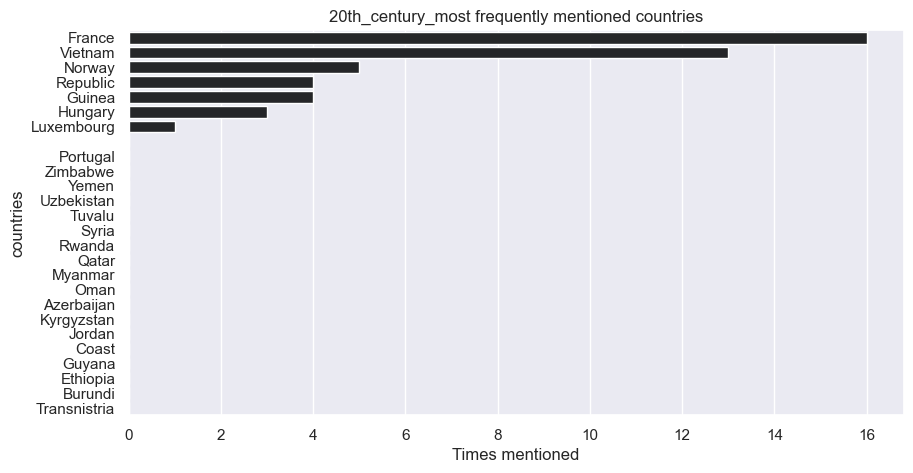

In [71]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "countries",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("20th_century_most frequently mentioned countries")

## From the 20th Century France was the most frequently mentioned followed by Vietnam, Norway Republic, Guinea, Hungary and Luxembourg etc
## While other country have zero frequence count


# Sentiment analysis

## My expectation from sentiment analysis
### Sentiment_ polarity = 0.7
### subjectivity = 0.3


In [73]:
text_sent = TextBlob(str(filtered))

In [74]:
print(text_sent.sentiment)

Sentiment(polarity=0.049109843922238446, subjectivity=0.35331078210715594)


## Sentiment_ polarity
## this implies that the polarity of the 20th-century information for research work is less than 0.05
## subjectivity
## 20th-century information has less than 0.04 subjectivity and implies that 20th-century information has about 0.0 objective